## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn

## Getting the Data

We'll work with the Ecommerce Customers csv file from the company.

In [5]:
customers = pd.read_csv('Ecommerce Customers')

**Checking the head of customers, and checking out its info() and describe() methods.**

In [6]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis


In [9]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

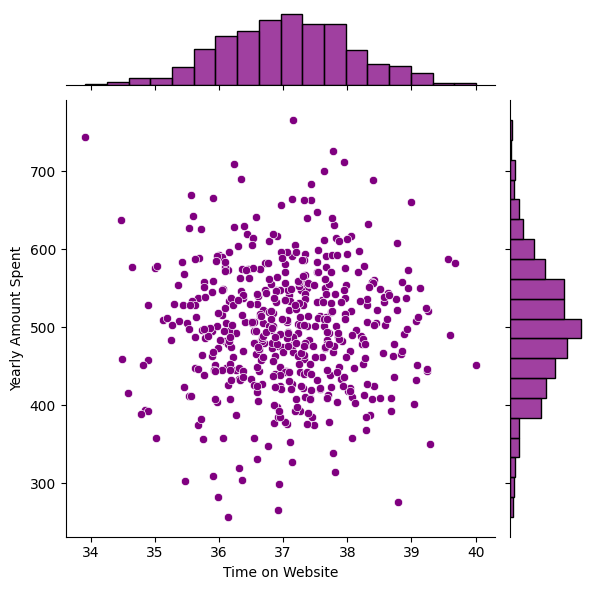

In [15]:
sns.jointplot(x=customers['Time on Website'], y=customers['Yearly Amount Spent'], color='purple')

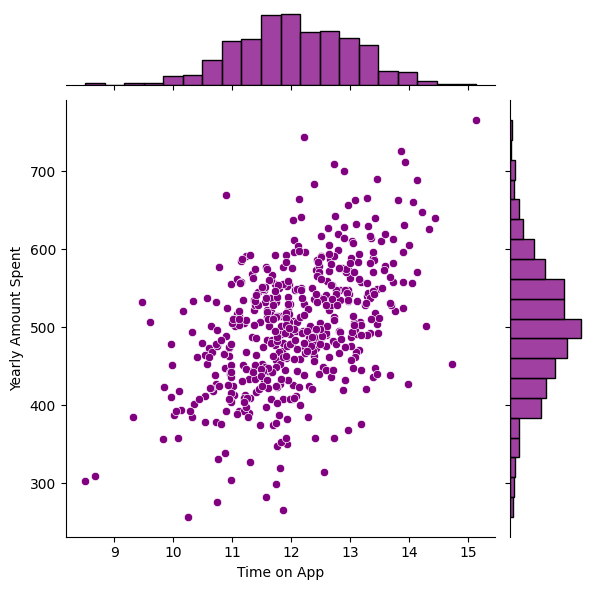

In [16]:
sns.jointplot(x=customers['Time on App'], y=customers['Yearly Amount Spent'], color='purple')

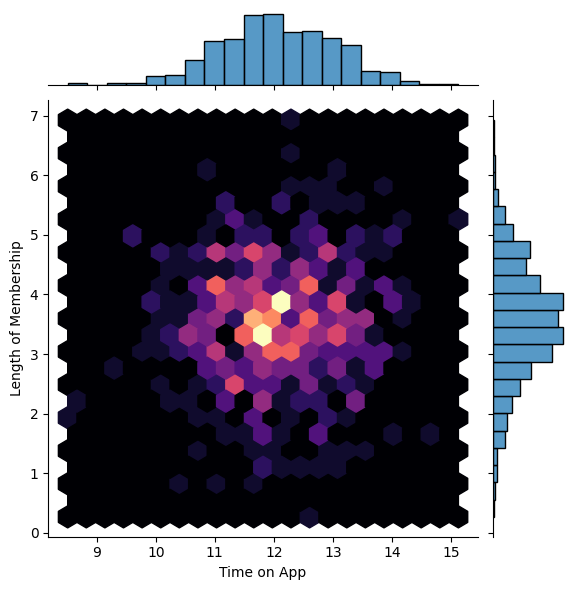

In [20]:
sns.jointplot(x=customers['Time on App'], y=customers['Length of Membership'], kind='hex', cmap='magma')

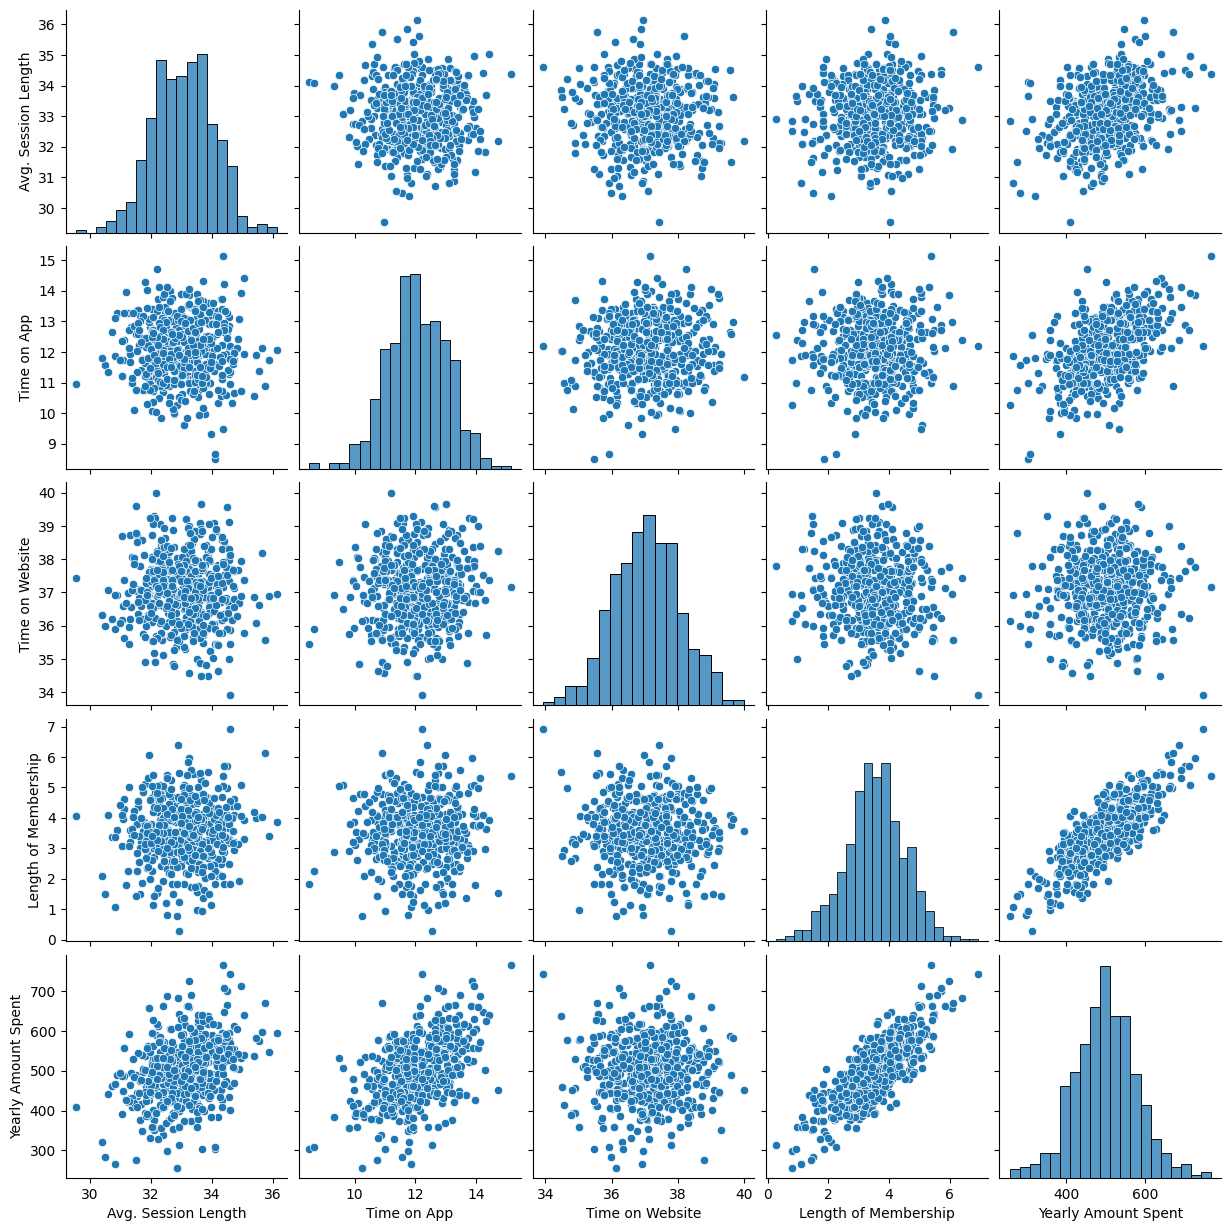

In [23]:
sns.pairplot(data=customers)

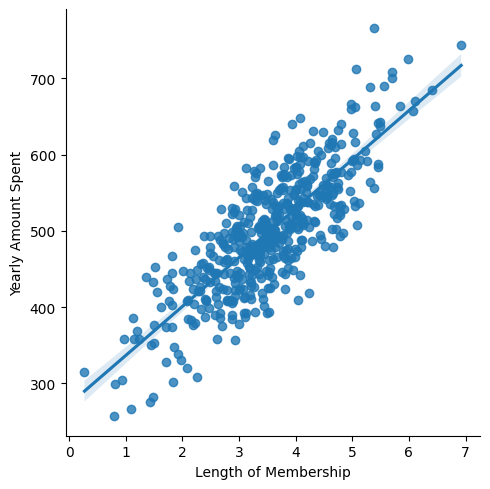

In [28]:
sns.lmplot(data=customers, x='Length of Membership', y='Yearly Amount Spent')

## Preparing the Data for Training and Testing

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Training the Model


In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lm = LinearRegression()

In [39]:
lm.fit(X_train, y_train)

LinearRegression()

In [40]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data

In [41]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Y Test vs. Predicted Y')

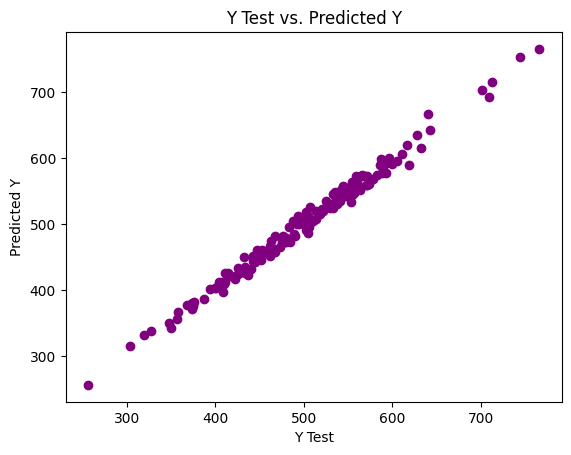

In [42]:
plt.scatter(y_test, predictions, color='purple')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Y Test vs. Predicted Y')

## Evaluating the Model


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"MAE: {mae}\nMSE: {mse}\nRMSE: {rmse}")

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624


## Residuals


/tmp/ipython-input-44-2142047227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions))


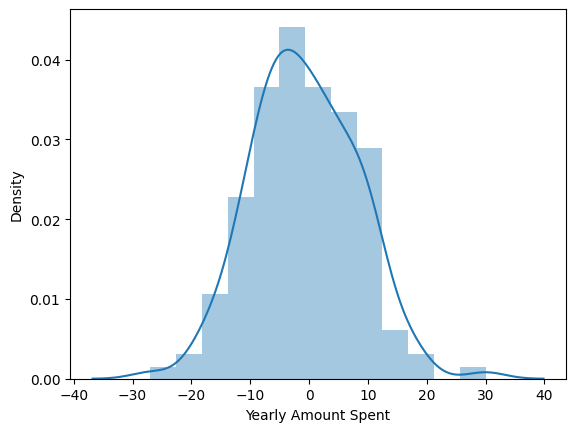

In [44]:
plt.figure()
sns.distplot((y_test - predictions))
plt.show()

## Conclusion
Let's figure out whether do we focus our efforts on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.


In [45]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
